In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import graphviz
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 딥러닝_다층 퍼셉트론(MLP)

여러 단계를 거쳐 결정을 만들어내는 선형 모델의 일반화 -> 입력특성과 거기서 학습된 가중치의 합

모델 구성: 1) 층의 개수 2) 층당 유닛 개수 3) 규제 4) 비선형성

- 장점: 대량의 데이터에 내재된 정보를 잡고 매우 복잡한 모델 생성 가능

     충분한 연산 시간과 데이터를 주고 매개변수 조정하면 종종 더 좋은 성능 보임


- 단점: (모델이 크고 강력하면) 종종 학습 오래 걸림

    데이터 전처리 중요 -> 모든 특성이 같은 의미를 가진 동질의 데이터에서 잘 작동, 다른 종류의 특성을 가진 데이터라면 트리 회귀 모형이 더 적합

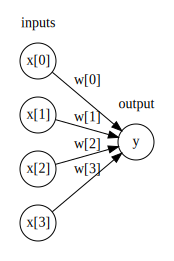

In [4]:
display(mglearn.plots.plot_logistic_regression_graph())

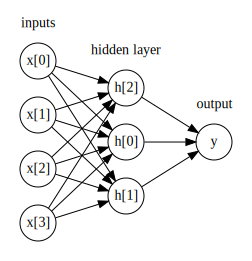

In [5]:
display(mglearn.plots.plot_single_hidden_layer_graph())

이런 모델은 많은 계수(가중치)를 학습 필요

-> 각 입력과 은닉층의 은닉 유닛 사이, 은닉 유닛과 출력 사이에 가중치 존재 

각 은닉 유닛의 합 계산한 뒤, 비선형 함수 ReLU or tanh(하이퍼볼릭 탄젠트) 적용

Text(0, 0.5, 'relu(x), tanh(x)')

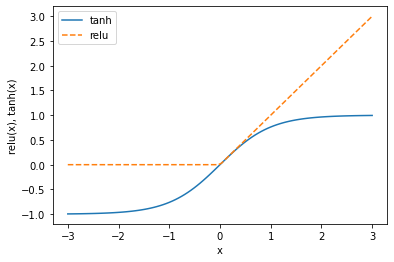

In [6]:
line = np.linspace(-3,3,100)
plt.plot(line,np.tanh(line),label='tanh')
plt.plot(line,np.maximum(line,0),linestyle='--',label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

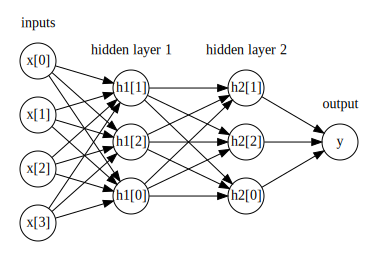

In [7]:
mglearn.plots.plot_two_hidden_layer_graph()

## 신경망 튜닝

Text(0, 0.5, 'Feature 1')

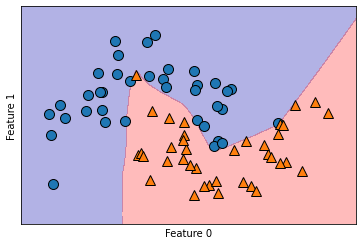

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42) #은닉층 유닛 개수 default값: 100

mlp = MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0.5, 0, 'Feature 1')

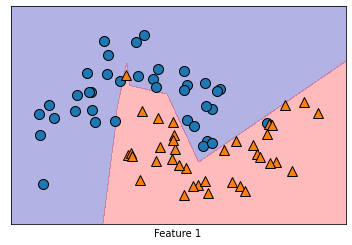

In [9]:
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10]) #hidden_layer_sizes: 은닉 유닛 개수 설정
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.xlabel('Feature 1')

더 매끄러운 결정 경계: 유닉 유닛 추가, 은닉층 추가, tanh 함수 사용

Text(0, 0.5, 'Feature 1')

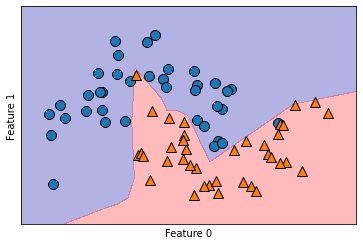

In [10]:
#10개의 유닛으로 된 두개의 은닉층
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

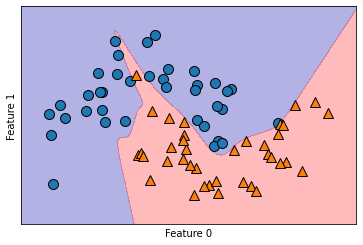

In [11]:
#tanh 활성화 함수가 적용된 10개의 유닛으로 된 2개의 은닉층
mlp = MLPClassifier(solver='lbfgs',activation='tanh',
                    random_state=0,hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

L2 패널티를 사용하여 가중치를 0에 가깝게 감소시켜 모델 복잡도 제어

규제 매개변수 alpha

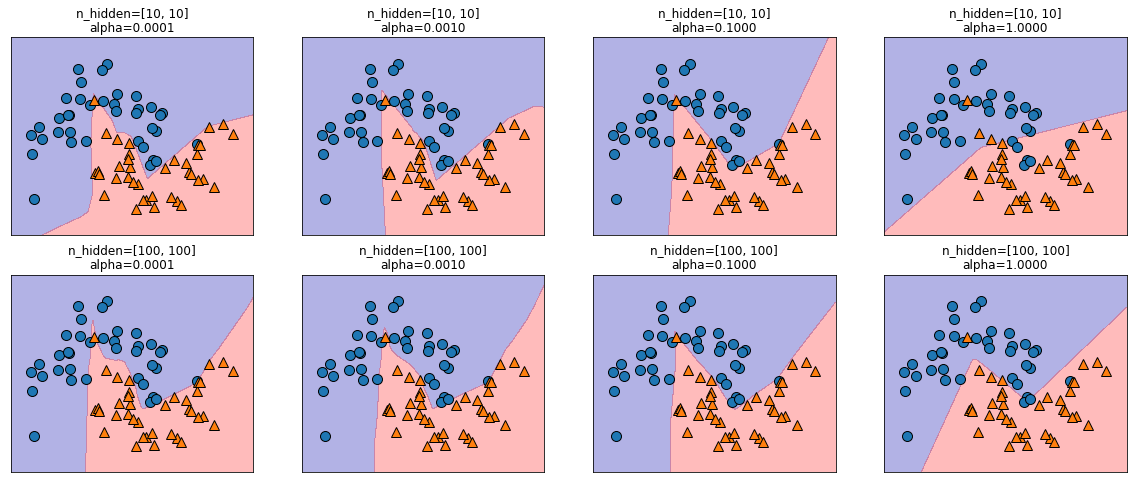

In [12]:
fig, axes = plt.subplots(2,4,figsize=(20,8))
for axx, n_hidden_nodes in zip(axes,[10,100]): #유닛이 10개와 100개인 은닉층 2개
    for ax, alpha in zip(axx,[0.0001,0.001,0.1,1]):
        mlp = MLPClassifier(solver='lbfgs',random_state=0,
                           hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],
                           alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title('n_hidden=[{}, {}]\nalpha={:.4f}'.format(
        n_hidden_nodes,n_hidden_nodes,alpha))

신경망은 학습 시작 전, 가중치를 무작위로 설정하며 무작위한 초기화가 모델의 학습에 영향 끼침

같은 매개변수를 사용하더라도 초깃값이 다르면 모델이 많이 달라짐 -> 신경망이 크고 복잡도가 적절하면 이 점 영향 크게 미치지 X

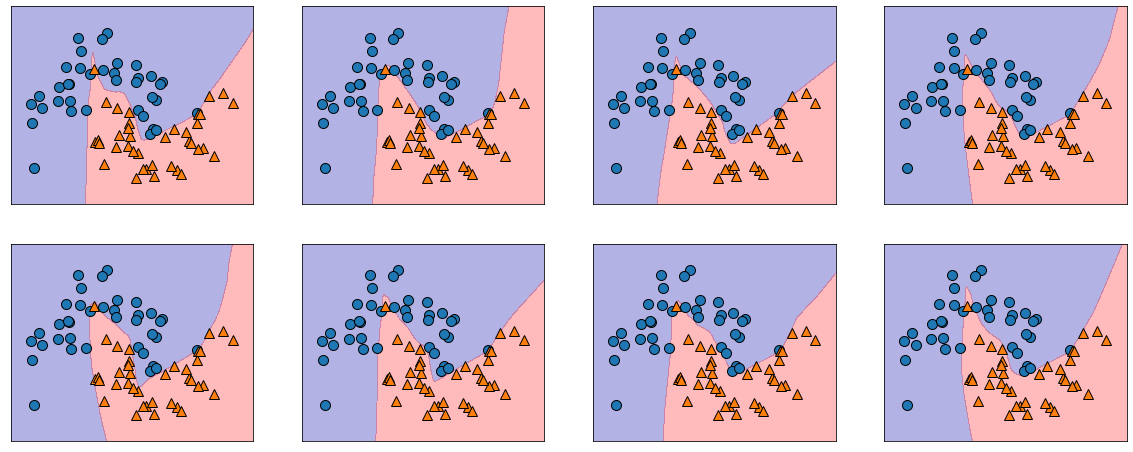

In [13]:
# 같은 매개변수, 초기화 다르게 한 모델
fig, axes = plt.subplots(2,4,figsize=(20,8))

for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs',random_state=i,
                       hidden_layer_sizes=[100,100])
    mlp.fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)

In [14]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print('유방암 데이터의 특성별 최댓값:\n',cancer.data.max(axis=0))

유방암 데이터의 특성별 최댓값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [17]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)

MLPClassifier(random_state=42)

In [19]:
print('훈련 세트 정확도:{:.2f}'.format(mlp.score(X_train,y_train)))
print('테스트 세트 정확도:{:.2f}'.format(mlp.score(X_test,y_test)))

훈련 세트 정확도:0.94
테스트 세트 정확도:0.92


신경망 모델에서는 모든 입력 특성 평균 0, 분산 1이 되도록 스케일링 해주는 것이 좋음

In [21]:
#직접 스케일링
#훈련 세트 각 특성의 평균 계산
mean_on_train = X_train.mean(axis=0)
#훈련 세트 표준편차 계산
std_on_train = X_train.std(axis=0)

#데이터에서 평균 빼고 표준편차로 나누기 -> 평균 0, 분산 1인 데이터로 변환
X_train_scaled = (X_train-mean_on_train)/std_on_train
#(훈련 데이터셋의 평균과 표준편차 이용하여) 테스트 데이터셋에도 적용  -> 왜??????????
X_test_scaled = (X_test-mean_on_train)/std_on_train

MLPClassifier(random_state=0)

In [26]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train)

print('훈련 세트 정확도:{:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('테스트 세트 정확도:{:.3f}'.format(mlp.score(X_test_scaled,y_test)))

훈련 세트 정확도:0.991
테스트 세트 정확도:0.965


In [25]:
#adam 알고리즘 반복 횟수 증가
mlp = MLPClassifier(max_iter=1000,random_state=0) 
mlp.fit(X_train_scaled,y_train)

print('훈련 세트 정확도:{:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('테스트 세트 정확도:{:.3f}'.format(mlp.score(X_test_scaled,y_test)))

훈련 세트 정확도:1.000
테스트 세트 정확도:0.972


In [27]:
#일반화 성능을 높이기 위해 모델의 복잡도 낮추기 -> 가중치를 강하게 주어 규제(alpha 0.001 -> 1)
mlp = MLPClassifier(max_iter=1000,alpha=1,random_state=0) 
mlp.fit(X_train_scaled,y_train)

print('훈련 세트 정확도:{:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('테스트 세트 정확도:{:.3f}'.format(mlp.score(X_test_scaled,y_test)))

훈련 세트 정확도:0.988
테스트 세트 정확도:0.972


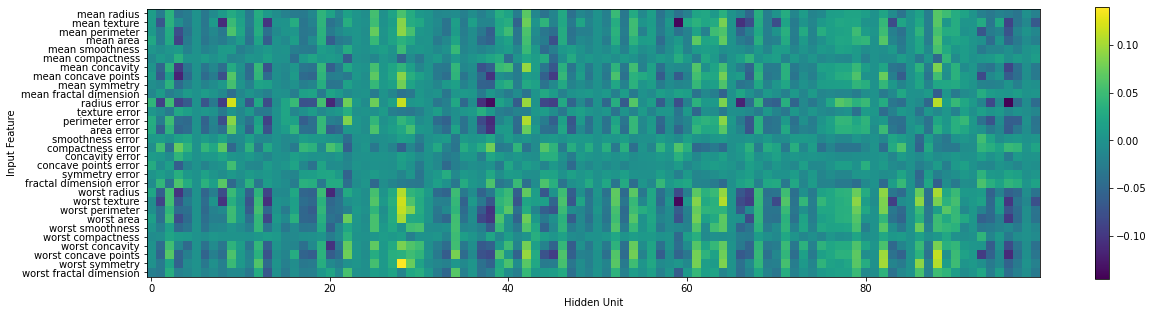

In [29]:
#가중치 확인하면 무엇이 학습되었는지 알 수 있음
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis') #mlp.coefs_[0]: 입력층과 은닉층 사이의 가중치
plt.yticks(range(30),cancer.feature_names) #30개의 입력 특성, 100개의 은닉 유닛
plt.xlabel('Hidden Unit')
plt.ylabel('Input Feature')
plt.colorbar()

모든 은닉 유닛에서 작은 가중치를 가진 특성은 모델에 덜 중요하거나 신경망에 적절하지 않음

은닉층과 출력층 사이의 가중치도 시각화 가능하지만, 해석 어려움

## 신경망의 복잡도 추정

신경망 중요 매개변수: 은닉층의 개수, 각 은닉층의 유닛 수
    
매개변수 조절 방법: 충분히 과대적합되어서 문제를 해결할만한 큰 모델 생성
   
   -> 훈련 데이터가 충분히 학습될 수 있다는 전제 하에, 신경망 구조를 줄이거나 규제 강화하여 일반화 성능 향상

In [31]:
#분류 예측 불확실성 추정: decision_function, predict_proba
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X,y = make_circles(noise=0.25,factor=0.5, random_state=1)

#클래스명 변경
y_named = np.array(['blue','red'])[y]

X_train,X_test,y_train_named,y_test_named,y_train,y_test = train_test_split(X,y_named,y,random_state=0)

#그레이디언트 부스팅 모델 생성
grbt = GradientBoostingClassifier(random_state=0)
grbt.fit(X_train,y_train_named)

GradientBoostingClassifier(random_state=0)

### 결정 함수

In [34]:
print('X_test.shape:',X_test.shape)
print('결정 함수 결과 형태:', grbt.decision_function(X_test).shape)

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


In [35]:
#결정 함수 결과 중 앞부분 일부 확인
print('결정함수:\n',grbt.decision_function(X_test)[:6]) #양성 클래스인 classes_[1]에 대응하는 값: 양수 값은 양성 클래스, 음수값은 음성 클래스

결정함수:
 [ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [36]:
print('임계치와 결정 함수 결과 비교:\n',grbt.decision_function(X_test)>0)
print('예측:\n',grbt.predict(X_test))

임계치와 결정 함수 결과 비교:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [37]:
#불리언 값을 0과 1로 변환
greater_zero = (grbt.decision_function(X_test)>0).astype(int)
#classes_에 인덱스로 사용
pred = grbt.classes_[greater_zero]
#pred와 grbt.predict 결과 비교
print('pred는 예측 결과와 같다:',np.all(pred==grbt.predict(X_test)))

pred는 예측 결과와 같다: True


음성 클래스는 classes_ 속성의 첫 번째 원소/ 양성 클래스는 classes_의 두번째 원소

In [43]:
#decision_function 값의 범위는 데이터와 모델 파라미터에 따라 달라짐
decision_function = grbt.decision_function(X_test)
print('결정 함수 최솟값:{:.2f}  최댓값:{:.2f}'.format(np.min(decision_function),np.max(decision_function)))

결정 함수 최솟값:-7.69  최댓값:4.29


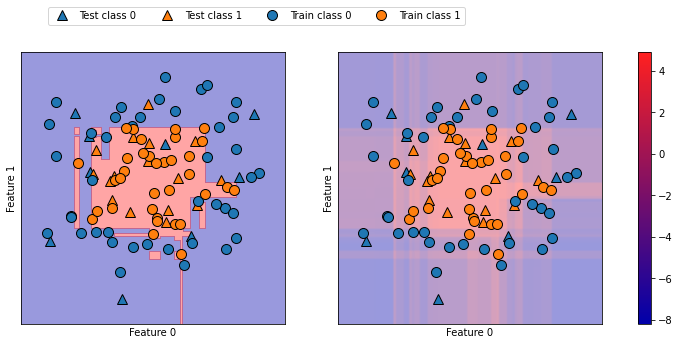

In [46]:
fig, axes = plt.subplots(1,2,figsize=(13,5))

mglearn.tools.plot_2d_separator(grbt,X,ax=axes[0],alpha=.4,fill=True,cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(grbt,X,ax=axes[1],alpha=.4,cm=mglearn.ReBl)

for ax in axes:
    #훈련 포인트와 테스트 포인트 그리기
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers='^',ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers='o',ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
cbar = plt.colorbar(scores_image,ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['Test class 0','Test class 1','Train class 0','Train class 1'],ncol=4,loc=(.1,1.1))

결정 함수 그래프에서 두 클래스 사이의 경계 구분 어려움

### 예측 확률

predict_proba: 각 출력에 대한 확률

In [47]:
print('확률 값의 형태:',grbt.predict_proba(X_test).shape) #이진분류:(n_samples,2)

확률 값의 형태: (25, 2)


In [48]:
print('예측 확률:\n',grbt.predict_proba(X_test[:6])) #두 클래스 중 50%이상의 확신을 가진 클래스가 예측값

예측 확률:
 [[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


일반적으로 복잡도가 낮은 모델은 예측에 대한 불확실성이 높음

불확실성 = 모델 정확도 -> 모델 보정

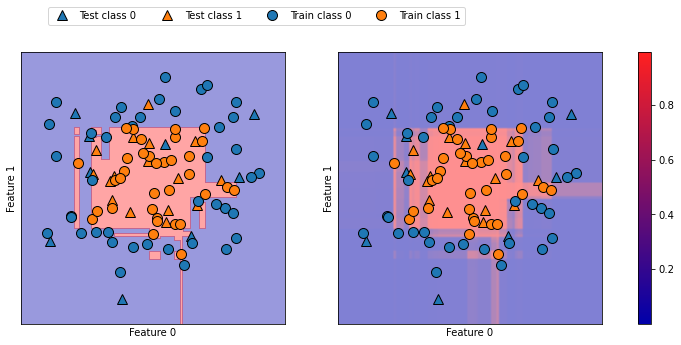

In [52]:
fig, axes = plt.subplots(1,2,figsize=(13,5))

mglearn.tools.plot_2d_separator(grbt,X,ax=axes[0],alpha=.4,fill=True,cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(grbt,X,ax=axes[1],alpha=.5,cm=mglearn.ReBl,function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers='^',ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers='o',ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    
cbar = plt.colorbar(scores_image,ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['Test class 0','Test class 1','Train class 0','Train class 1'],ncol=4,loc=(.1,1.1))

In [53]:
#다중 분류에서의 불확실성
from sklearn.datasets import load_iris

iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=42)
grbt = GradientBoostingClassifier(learning_rate=0.01,random_state=0)
grbt.fit(X_train,y_train)

print('결정 함수의 결과 형태:',grbt.decision_function(X_test).shape)
#decision_function 결과 앞부분 출력 (n_samples,n_classes), 수치가 크면 그 클래스일 가능성 크고 수치가 작으면 그 클래스일 가능성 낮음
print('결정 함수 결과:\n',grbt.decision_function(X_test)[:6,:])

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
 [[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


In [54]:
print('가장 큰 결정함수의 인덱스:\n',np.argmax(grbt.decision_function(X_test),axis=1))
print('예측:\n',grbt.predict(X_test))

가장 큰 결정함수의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [55]:
print('예측 확률:\n',grbt.predict_proba(X_test)[:6]) #각 데이터 포인트에서 클래스의 확률 합 1
print('합:',grbt.predict_proba(X_test)[:6].sum(axis=1))

예측 확률:
 [[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
합: [1. 1. 1. 1. 1. 1.]


In [56]:
print('가장 큰 예측 확률의 인덱스:\n',np.argmax(grbt.predict_proba(X_test),axis=1))
print('예측:\n',grbt.predict(X_test))

가장 큰 예측 확률의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [58]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#iris 데이터셋의 타깃을 클래스 이름으로 나타내기
named_target = iris.target_names[y_train]
logreg.fit(X_train,named_target)
print('훈련 데이터에 있는 클래스 종류:',logreg.classes_)
print('예측:',logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test),axis=1)
print('가장 큰 결정함수의 인덱스:',argmax_dec_func[:10])

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
